In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
# Importing the training set
dataset_ts = pd.read_csv(r'G:\Ddrive\PG DBDA\12 Practical Machine Learning_\Datasets\monthly-milk-production-pounds-p.csv')

dataset_ts.head()

,Month,Milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [40]:
dataset_ts.shape

(168, 2)

In [41]:
dataset_train = dataset_ts.iloc[:-12,:]
dataset_train.shape

(156, 2)

In [42]:
training_set = dataset_train.iloc[:, 1].values
training_set[:5]

array([589, 561, 640, 656, 727], dtype=int64)

In [43]:
training_set.shape

(156,)

In [44]:
training_set = training_set.reshape(-1,1)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [45]:
training_set.shape

(156, 1)

In [46]:
training_set_scaled[:5]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923]])

In [47]:
timesteps=12
trn_size = dataset_train.shape[0]

In [48]:
trn_size

156

In [49]:
X_train = []
y_train = []
for i in range(timesteps, trn_size):
    X_train.append(training_set_scaled[i-timesteps:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [50]:
X_train.shape

(144, 12)

In [51]:
X_train[:1]

array([[0.08653846, 0.01923077, 0.20913462, 0.24759615, 0.41826923,
        0.34615385, 0.20913462, 0.11057692, 0.03605769, 0.05769231,
        0.        , 0.06971154]])

In [52]:
y_train[:1]

array([0.11298077])

In [53]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [54]:
X_train.shape

(144, 12, 1)

In [55]:
import tensorflow as tf
from tensorflow import keras

In [56]:
(X_train.shape[1],X_train.shape[2])

(12, 1)

In [57]:
tf.random.set_seed(seed=2021)
model = keras.Sequential([
   tf.keras.layers.LSTM(units=100,return_sequences = True, 
                            input_shape= (X_train.shape[1],X_train.shape[2]) ),
   tf.keras.layers.LSTM(units=70,return_sequences = True ) ,
   tf.keras.layers.LSTM(units=50 ) ,
   tf.keras.layers.Dense(1)                           
])
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 12, 100)           40800     
                                                                 
 lstm_4 (LSTM)               (None, 12, 70)            47880     
                                                                 
 lstm_5 (LSTM)               (None, 50)                24200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 112,931
Trainable params: 112,931
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.fit(X_train, y_train, epochs = 50, batch_size = 25)

Epoch 1/50
6/6 [==============================] - 31s 67ms/step - loss: 0.2171
Epoch 2/50
6/6 [==============================] - 0s 67ms/step - loss: 0.0529
Epoch 3/50
6/6 [==============================] - 0s 56ms/step - loss: 0.0310
Epoch 4/50
6/6 [==============================] - 0s 56ms/step - loss: 0.0358
Epoch 5/50
6/6 [==============================] - 0s 56ms/step - loss: 0.0259
Epoch 6/50
6/6 [==============================] - 0s 56ms/step - loss: 0.0270
Epoch 7/50
6/6 [==============================] - 0s 56ms/step - loss: 0.0250
Epoch 8/50
6/6 [==============================] - 0s 56ms/step - loss: 0.0240
Epoch 9/50
6/6 [==============================] - 0s 56ms/step - loss: 0.0235
Epoch 10/50
6/6 [==============================] - 0s 59ms/step - loss: 0.0227
Epoch 11/50
6/6 [==============================] - 0s 63ms/step - loss: 0.0222
Epoch 12/50
6/6 [==============================] - 0s 56ms/step - loss: 0.0220
Epoch 13/50
6/6 [==============================] - 0s 56ms/s

In [60]:
dataset_test = dataset_ts.iloc[-12:,:]
dataset_test.shape

(12, 2)

In [61]:
test_set = dataset_test.iloc[:, 1].values
test_set

array([834, 782, 892, 903, 966, 937, 896, 858, 817, 827, 797, 843],
      dtype=int64)

In [62]:
dataset_total = pd.concat((dataset_train['Milk'], dataset_test['Milk']), axis = 0)
dataset_total

0      589
1      561
2      640
3      656
4      727
      ... 
163    858
164    817
165    827
166    797
167    843
Name: Milk, Length: 168, dtype: int64

In [63]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values
inputs = inputs.reshape(-1,1)
len(inputs)

24

In [64]:
inputs = sc.transform(inputs)
X_test = []
for i in range(timesteps, len(inputs)):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(12, 12, 1)

In [65]:
predicted_values = model.predict(X_test)
predicted_values

1/1 [==============================] - 6s 6s/step


array([[0.6085314 ],
       [0.6246715 ],
       [0.7521448 ],
       [0.80520505],
       [0.8649386 ],
       [0.8476037 ],
       [0.79941654],
       [0.73081833],
       [0.6545519 ],
       [0.618601  ],
       [0.5778108 ],
       [0.61196846]], dtype=float32)

In [66]:
predicted_values.shape

(12, 1)

In [67]:
predicted_values = sc.inverse_transform(predicted_values)
predicted_values

array([[806.14905],
       [812.86334],
       [865.8922 ],
       [887.96533],
       [912.8145 ],
       [905.60315],
       [885.55725],
       [857.0204 ],
       [825.2936 ],
       [810.338  ],
       [793.3693 ],
       [807.57886]], dtype=float32)

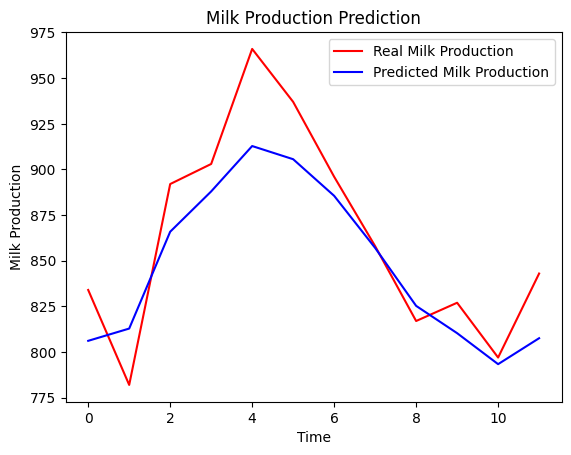

In [68]:
%matplotlib inline
plt.plot(test_set, color = 'red', label = 'Real Milk Production')
plt.plot(predicted_values, color = 'blue', label = 'Predicted Milk Production')
plt.title('Milk Production Prediction')
plt.xlabel('Time')
plt.ylabel('Milk Production')
plt.legend()
plt.show()

In [69]:
print(np.sqrt(mean_squared_error(predicted_values,test_set)))

26.100115710506604


43.36701641476088